In [1]:
import pandas as pd
import numpy as np
from sympy import *
from sklearn.tree import plot_tree
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

### Regressor

In [2]:
X,y = make_regression(n_samples=10, n_features=3)

In [3]:
X

array([[ 1.18364646, -1.07315609,  0.9535462 ],
       [-0.7616281 ,  0.26793157, -1.5464126 ],
       [ 1.0464591 , -0.52031241, -0.648715  ],
       [ 1.45874069,  0.9567993 ,  0.59861011],
       [ 0.11515398,  0.77591108,  0.41559541],
       [-0.05879936,  1.04069727, -0.37266572],
       [ 1.19621635,  0.54277433,  0.30142806],
       [ 0.27523679,  0.59498601, -0.15107492],
       [ 0.04198505,  1.34000544,  1.25636189],
       [-1.11148461, -0.77558678,  0.30287299]])

In [4]:
y

array([ 131.67887341, -146.38386222,   27.60816351,  146.686975  ,
         40.65112875,  -17.98679411,  106.38463845,   14.95919987,
         92.7741205 ,  -65.06386623])

In [5]:
df = pd.DataFrame(X)

In [6]:
df['y_true']=y

In [7]:
df

,0,1,2,y_true
0,1.183646,-1.073156,0.953546,131.678873
1,-0.761628,0.267932,-1.546413,-146.383862
2,1.046459,-0.520312,-0.648715,27.608164
3,1.458741,0.956799,0.598610,146.686975
4,0.115154,0.775911,0.415595,40.651129
5,-0.058799,1.040697,-0.372666,-17.986794
6,1.196216,0.542774,0.301428,106.384638
7,0.275237,0.594986,-0.151075,14.959200
8,0.041985,1.340005,1.256362,92.774121
9,-1.111485,-0.775587,0.302873,-65.063866


In [8]:
#On step 1 we make constant prediction
df['y_pred_0']=df['y_true'].mean()

In [9]:
df

,0,1,2,y_true,y_pred_0
0,1.183646,-1.073156,0.953546,131.678873,33.130858
1,-0.761628,0.267932,-1.546413,-146.383862,33.130858
2,1.046459,-0.520312,-0.648715,27.608164,33.130858
3,1.458741,0.956799,0.598610,146.686975,33.130858
4,0.115154,0.775911,0.415595,40.651129,33.130858
5,-0.058799,1.040697,-0.372666,-17.986794,33.130858
6,1.196216,0.542774,0.301428,106.384638,33.130858
7,0.275237,0.594986,-0.151075,14.959200,33.130858
8,0.041985,1.340005,1.256362,92.774121,33.130858
9,-1.111485,-0.775587,0.302873,-65.063866,33.130858


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [11]:
mean_absolute_error(df['y_true'],df['y_pred_0'])

70.50428953080065

In [12]:
#Now we have to count residuals

df['residuals_0']=df['y_true']-df['y_pred_0']

In [13]:
df

,0,1,2,y_true,y_pred_0,residuals_0
0,1.183646,-1.073156,0.953546,131.678873,33.130858,98.548016
1,-0.761628,0.267932,-1.546413,-146.383862,33.130858,-179.514720
2,1.046459,-0.520312,-0.648715,27.608164,33.130858,-5.522694
3,1.458741,0.956799,0.598610,146.686975,33.130858,113.556117
4,0.115154,0.775911,0.415595,40.651129,33.130858,7.520271
5,-0.058799,1.040697,-0.372666,-17.986794,33.130858,-51.117652
6,1.196216,0.542774,0.301428,106.384638,33.130858,73.253781
7,0.275237,0.594986,-0.151075,14.959200,33.130858,-18.171658
8,0.041985,1.340005,1.256362,92.774121,33.130858,59.643263
9,-1.111485,-0.775587,0.302873,-65.063866,33.130858,-98.194724


In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
tree_1 = DecisionTreeRegressor(max_depth=1)

In [16]:
tree_1.fit(df[[0,1,2]],df['residuals_0'])

DecisionTreeRegressor(max_depth=1)

In [17]:
df['tree_pred_1'] = tree_1.predict(df[[0,1,2]])

In [18]:
df

,0,1,2,y_true,y_pred_0,residuals_0,tree_pred_1
0,1.183646,-1.073156,0.953546,131.678873,33.130858,98.548016,46.975299
1,-0.761628,0.267932,-1.546413,-146.383862,33.130858,-179.514720,-109.609032
2,1.046459,-0.520312,-0.648715,27.608164,33.130858,-5.522694,46.975299
3,1.458741,0.956799,0.598610,146.686975,33.130858,113.556117,46.975299
4,0.115154,0.775911,0.415595,40.651129,33.130858,7.520271,46.975299
5,-0.058799,1.040697,-0.372666,-17.986794,33.130858,-51.117652,-109.609032
6,1.196216,0.542774,0.301428,106.384638,33.130858,73.253781,46.975299
7,0.275237,0.594986,-0.151075,14.959200,33.130858,-18.171658,46.975299
8,0.041985,1.340005,1.256362,92.774121,33.130858,59.643263,46.975299
9,-1.111485,-0.775587,0.302873,-65.063866,33.130858,-98.194724,-109.609032


[Text(0.5, 0.75, 'X[0] <= -0.008\nsquared_error = 7642.815\nsamples = 10\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 2812.778\nsamples = 3\nvalue = -109.609'),
 Text(0.75, 0.25, 'squared_error = 2357.236\nsamples = 7\nvalue = 46.975')]

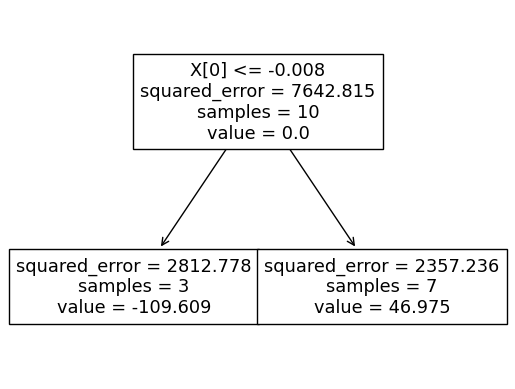

In [19]:
plot_tree(tree_1)

We see that most important feture is feature_1, and the best split is threshold '-0.269'.

Then, if the value is less then '-0.269' we predict -101.321, else we predict 67.547

In [20]:
nu = 0.1

In [21]:
df['y_pred_1']= df['y_pred_0']+nu*df['tree_pred_1']

In [22]:
mean_absolute_error(df['y_true'],df['y_pred_1'])

65.80675959296232

In [23]:
df['residuals_1']=df['y_true']-df['y_pred_1']

In [24]:
tree_2 = DecisionTreeRegressor(max_depth=1)

In [25]:
tree_2.fit(df[[0,1,2]],df['residuals_1'])

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= -0.008\nsquared_error = 6664.521\nsamples = 10\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 2812.778\nsamples = 3\nvalue = -98.648'),
 Text(0.75, 0.25, 'squared_error = 2357.236\nsamples = 7\nvalue = 42.278')]

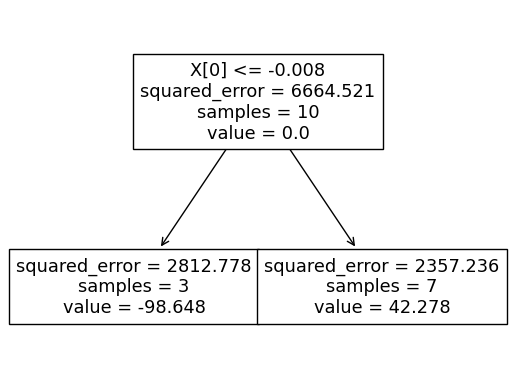

In [26]:
plot_tree(tree_2)

In [27]:
df['y_pred_2']= df['y_pred_1']+nu*tree_2.predict(df[[0,1,2]])

In [28]:
mean_absolute_error(df['y_true'],df['y_pred_2'])

61.85998981336635

Let's make GB using for loop

In [29]:
df=df[[0,1,2,'y_true']].copy()

In [30]:
df

,0,1,2,y_true
0,1.183646,-1.073156,0.953546,131.678873
1,-0.761628,0.267932,-1.546413,-146.383862
2,1.046459,-0.520312,-0.648715,27.608164
3,1.458741,0.956799,0.598610,146.686975
4,0.115154,0.775911,0.415595,40.651129
5,-0.058799,1.040697,-0.372666,-17.986794
6,1.196216,0.542774,0.301428,106.384638
7,0.275237,0.594986,-0.151075,14.959200
8,0.041985,1.340005,1.256362,92.774121
9,-1.111485,-0.775587,0.302873,-65.063866


In [31]:
100 % 10

0

In [32]:
n =5000
nu = 0.1
trees = []
df['y_pred'] = df['y_true'].mean()


for i in range(n):
    df['residual']=df['y_true'] - df['y_pred']
    tree = DecisionTreeRegressor(max_depth = 1)
    tree.fit(df[[0,1,2]],df['residual'])
    df['y_pred'] += nu*tree.predict(df[[0,1,2]])
    trees.append(tree)
    if (i % 100) == 0:
        print(mean_absolute_error(df['y_true'],df['y_pred']))

65.80675959296232
1.915921602471267
1.0445561436741913
0.6203242903076086
0.37180381356867825
0.22699851437201862
0.14070948742967815
0.0864068246969211
0.0532936566613051
0.03298717507677047
0.020389294548957437
0.012566241376111797
0.007685292743514083
0.004808815660710763
0.0029442160937238173
0.0018234487450181191
0.0011358394770448754
0.0006943125042145227
0.000428037054612318
0.00026411645885247024
0.00016383275083029503
0.0001015021208264244
6.211120975869733e-05
3.8774738358959834e-05
2.3765813997655982e-05
1.4573203609735686e-05
9.080030819141882e-06
5.584445950646e-06
3.4642849952248867e-06
2.136905089322738e-06
1.3148782780803003e-06
8.115733164615335e-07
5.076651218516304e-07
3.140576700033648e-07
1.9359406131513878e-07
1.1788330542827907e-07
7.27720456339398e-08
4.507630464445356e-08
2.7901251264950133e-08
1.7309045041713488e-08
1.1864091931101939e-08
1.1864091931101939e-08
1.1864091931101939e-08
1.1864091931101939e-08
1.1864091931101939e-08
1.1864091931101939e-08
1.186409

In [33]:
test=df[[0,1,2]].copy()

In [34]:
test['y_pred']=df['y_true'].mean()

In [35]:
for tree in trees:
    test['y_pred'] += nu *  tree.predict(df[[0,1,2]])

In [36]:
test

,0,1,2,y_pred
0,1.183646,-1.073156,0.953546,131.678873
1,-0.761628,0.267932,-1.546413,-146.383862
2,1.046459,-0.520312,-0.648715,27.608163
3,1.458741,0.956799,0.598610,146.686975
4,0.115154,0.775911,0.415595,40.651129
5,-0.058799,1.040697,-0.372666,-17.986794
6,1.196216,0.542774,0.301428,106.384638
7,0.275237,0.594986,-0.151075,14.959200
8,0.041985,1.340005,1.256362,92.774120
9,-1.111485,-0.775587,0.302873,-65.063866


y_true = Symbol('y_true')
y_pred = Symbol('y_pred')

In [37]:
y_true = Symbol('y_true')
y_pred = Symbol('y_pred')

In [38]:
1/2*(y_true-y_pred)**2

0.5*(-y_pred + y_true)**2

In [39]:
diff(1/2*(y_true-y_pred)**2,y_pred)

1.0*y_pred - 1.0*y_true

In [40]:
str(diff(1/2*(y_true-y_pred)**2,y_pred))

'1.0*y_pred - 1.0*y_true'

In [41]:
-(y_true - y_pred)

y_pred - y_true

### Classifier

In [42]:
X, y = make_classification(n_samples=10,n_features=3,n_redundant=0)

In [43]:
df = pd.DataFrame(X)
df['y_true'] = y

In [44]:
df

,0,1,2,y_true
0,-1.454556,-0.043245,0.146780,1
1,-0.096646,-0.595320,0.432970,1
2,-0.239477,1.799347,0.783972,1
3,-0.348354,-0.956205,-1.097729,0
4,0.845638,-1.126061,1.382194,1
5,0.555960,0.645054,3.481544,1
6,0.250645,0.845656,-0.766981,0
7,-1.179168,-1.799384,-1.555949,0
8,-0.842090,1.565133,-0.639839,0
9,-1.747563,0.161952,-0.050866,0


In [45]:
df['y_pred'] = df['y_true'].mean()

In [46]:
roc_auc_score(df['y_true'],df['y_pred'])

0.5

In [47]:
n = 10
nu = 0.1
trees = []
df['y_pred'] = df['y_true'].mean()

for i in range(n):
    df['residual'] = df['y_true'] - df['y_pred']
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(df[[0,1,2]],df['residual'])
    df['y_pred'] += nu * tree.predict(df[[0,1,2]])
    trees.append(tree)
    print(roc_auc_score(df['y_true'],df['y_pred']))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [48]:
df

,0,1,2,y_true,y_pred,residual
0,-1.454556,-0.043245,0.146780,1,0.825661,0.19371
1,-0.096646,-0.595320,0.432970,1,0.825661,0.19371
2,-0.239477,1.799347,0.783972,1,0.825661,0.19371
3,-0.348354,-0.956205,-1.097729,0,0.174339,-0.19371
4,0.845638,-1.126061,1.382194,1,0.825661,0.19371
5,0.555960,0.645054,3.481544,1,0.825661,0.19371
6,0.250645,0.845656,-0.766981,0,0.174339,-0.19371
7,-1.179168,-1.799384,-1.555949,0,0.174339,-0.19371
8,-0.842090,1.565133,-0.639839,0,0.174339,-0.19371
9,-1.747563,0.161952,-0.050866,0,0.174339,-0.19371


It is wrong to code GB in this way, but the notebooks is just for learning